<a href="https://colab.research.google.com/github/Abimbola-ai/Blood-Spectorscopy/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from prettytable import PrettyTable
from tqdm import tqdm
tqdm.pandas()
import tqdm
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')
seed = 42

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [4]:
# train = pd.read_csv("Data/clean_train.csv",index_col=[0])
# test = pd.read_csv("Data/clean_test.csv",index_col=[0])
train = pd.read_csv("clean_train.csv",index_col=[0])
test = pd.read_csv("clean_test.csv",index_col=[0])

In [5]:
scaled_features_train = train.copy()
scaled_features_test = test.copy()

def scale_data(df):
    col_names = ['absorbance0', 'absorbance1', 'absorbance2',
       'absorbance3', 'absorbance4', 'absorbance5', 'absorbance6',
       'absorbance7', 'absorbance8', 'absorbance9', 'absorbance10',
       'absorbance11', 'absorbance12', 'absorbance13', 'absorbance14',
       'absorbance15', 'absorbance16', 'absorbance17', 'absorbance18',
       'absorbance19', 'absorbance20', 'absorbance21', 'absorbance22',
       'absorbance23', 'absorbance24', 'absorbance25', 'absorbance26',
       'absorbance27', 'absorbance28', 'absorbance29', 'absorbance30',
       'absorbance31', 'absorbance32', 'absorbance33', 'absorbance34',
       'absorbance35', 'absorbance36', 'absorbance37', 'absorbance38',
       'absorbance39', 'absorbance40', 'absorbance41', 'absorbance42',
       'absorbance43', 'absorbance44', 'absorbance45', 'absorbance46',
       'absorbance47', 'absorbance48',
       'absorbance49', 'absorbance50', 'absorbance51', 'absorbance52',
       'absorbance53', 'absorbance54', 'absorbance55', 'absorbance56',
       'absorbance57', 'absorbance58', 'absorbance59', 'absorbance60',
       'absorbance61', 'absorbance62', 'absorbance63', 'absorbance64',
       'absorbance65', 'absorbance66', 'absorbance67', 'absorbance68',
       'absorbance69', 'absorbance70', 'absorbance71', 'absorbance72',
       'absorbance73', 'absorbance74', 'absorbance75', 'absorbance76',
       'absorbance77', 'absorbance78', 'absorbance79', 'absorbance80',
       'absorbance81', 'absorbance82', 'absorbance83', 'absorbance84',
       'absorbance85', 'absorbance86', 'absorbance87', 'absorbance88',
       'absorbance89', 'absorbance90', 'absorbance91', 'absorbance92',
       'absorbance93', 'absorbance94', 'absorbance95', 'absorbance96',
       'absorbance97', 'absorbance98',
       'absorbance99', 'absorbance100', 'absorbance101', 'absorbance102',
       'absorbance103', 'absorbance104', 'absorbance105', 'absorbance106',
       'absorbance107', 'absorbance108', 'absorbance109', 'absorbance110',
       'absorbance111', 'absorbance112', 'absorbance113', 'absorbance114',
       'absorbance115', 'absorbance116', 'absorbance117', 'absorbance118',
       'absorbance119', 'absorbance120', 'absorbance121', 'absorbance122',
       'absorbance123', 'absorbance124', 'absorbance125', 'absorbance126',
       'absorbance127', 'absorbance128', 'absorbance129', 'absorbance130',
       'absorbance131', 'absorbance132', 'absorbance133', 'absorbance134',
       'absorbance135', 'absorbance136', 'absorbance137', 'absorbance138',
       'absorbance139', 'absorbance140', 'absorbance141', 'absorbance142',
       'absorbance143', 'absorbance144', 'absorbance145', 'absorbance146',
       'absorbance147', 'absorbance148', 'absorbance149', 'absorbance150',
       'absorbance151', 'absorbance152', 'absorbance153', 'absorbance154',
       'absorbance155', 'absorbance156', 'absorbance157', 'absorbance158',
       'absorbance159', 'absorbance160', 'absorbance161', 'absorbance162',
       'absorbance163', 'absorbance164', 'absorbance165', 'absorbance166',
       'absorbance167', 'absorbance168', 'absorbance169', 'temperature',
       'humidity','std', 'low_abs', 'high_abs', 'med_abs',
       'mean_abs', 'std_abs', 'sum_abs']
    features = df[col_names]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    return df

In [6]:
train_scaled = scale_data(scaled_features_train)
test_scaled = scale_data(scaled_features_test)

In [7]:
train_scaled.head()

,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,std,low_abs,high_abs,med_abs,mean_abs,std_abs,sum_abs
0,1975,0.652042,0.642710,0.633364,0.623264,0.622399,0.609421,0.592866,0.584126,0.577179,...,0,1,1,0.790323,0.654070,0.817091,0.633388,0.781237,0.805277,0.781237
1,1982,0.698607,0.687373,0.673512,0.669837,0.664034,0.648212,0.627822,0.618668,0.610307,...,0,1,2,0.306452,0.700665,0.516564,0.479843,0.519043,0.472824,0.519043
2,1989,0.680759,0.676126,0.666238,0.668406,0.669962,0.662563,0.643781,0.629202,0.610788,...,0,1,2,0.354839,0.682876,0.750031,0.512484,0.612633,0.653710,0.612633
3,2018,0.674998,0.668067,0.660314,0.658546,0.652947,0.650522,0.640554,0.632638,0.623293,...,2,1,1,0.935484,0.677097,0.724927,0.572940,0.705100,0.685085,0.705100
4,2045,0.568017,0.557618,0.541519,0.530828,0.526682,0.510204,0.493224,0.482760,0.467903,...,1,1,1,0.435484,0.569784,0.800377,0.341514,0.570974,0.789363,0.570974


In [8]:
train.head()

,donation_id,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,std,low_abs,high_abs,med_abs,mean_abs,std_abs,sum_abs
0,1975,0.505055,0.506570,0.511544,0.516300,0.524067,0.530191,0.536138,0.542317,0.551118,...,0,1,1,0.0073,0.505055,1.927817,0.958842,1.135224,0.497048,192.988096
1,1982,0.523531,0.523485,0.526291,0.532875,0.538397,0.543180,0.547520,0.553433,0.561674,...,0,1,2,0.0043,0.523485,1.734845,0.916559,1.061186,0.421130,180.401567
2,1989,0.516449,0.519226,0.523619,0.532366,0.540438,0.547985,0.552716,0.556823,0.561827,...,0,1,2,0.0046,0.516449,1.884757,0.925547,1.087614,0.462437,184.894345
3,2018,0.514163,0.516174,0.521443,0.528857,0.534581,0.543953,0.551666,0.557929,0.565811,...,2,1,1,0.0082,0.514163,1.868637,0.942196,1.113725,0.469601,189.333202
4,2045,0.471717,0.474344,0.477808,0.483401,0.491121,0.496970,0.503694,0.509696,0.516301,...,1,1,1,0.0051,0.471717,1.917085,0.878465,1.075850,0.493414,182.894524


In [9]:
# Raw Data
y_hdl_cholesterol_human = train_scaled['hdl_cholesterol_human']
y_hemoglobin_hgb_human = train_scaled['hemoglobin(hgb)_human']
y_cholesterol_ldl_human = train_scaled["cholesterol_ldl_human"]
train_unscaled = train.drop(['donation_id', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human'], axis=1)
train_scaled_drop = train_scaled.drop(['donation_id', 'hdl_cholesterol_human', 'hemoglobin(hgb)_human',
       'cholesterol_ldl_human'], axis=1)

df_train = train_scaled_drop.copy()
df_trainu = train_unscaled.copy() #Unscaled data
print(df_train.shape)
print(y_hdl_cholesterol_human.shape)
print(y_hemoglobin_hgb_human.shape)
print(y_cholesterol_ldl_human.shape)

(355, 179)
(355,)
(355,)
(355,)


In [10]:
X_cols = list(df_train.columns)
X_test = test_scaled[X_cols] # Scaled test data
X_testu = test[X_cols] # Unscaled test data

In [9]:
def hyperparameter_model(models, params, x_train, y_train):
    '''
    Hyperparameter tuning with RepeatedStratifiedKFold follow by GridSearchCV
    
    Parameters:
    models: Instance of the model
    params: list of parameters with value for tuning (dict)
    
    Return:
    grid_clf: return gridsearch model    
    '''
    str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)
    grid_clf = GridSearchCV(models, params, cv=str_cv, return_train_score=True, scoring='roc_auc')
    grid_clf.fit(x_train, y_train)
    return grid_clf

def forward_selection_model(x_train, y_train,model, top_n=10):
    top_column = []
    exist_score = 0
    for n in range(top_n):
        print('for {} feature'.format(n+1))
        flag = 0
        for i in tqdm.tqdm_notebook(range(X_test.shape[1])):
            if len(top_column) == 0:
                str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                score = cross_val_score(model,x_train[:,[i]],y_train,cv=str_cv,scoring='roc_auc')
                if exist_score < np.mean(score):
                    top_current = i
                    exist_score = np.mean(score)
                    flag = 1
            elif i not in top_column:
                str_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)
                score = cross_val_score(model,x_train[:,np.concatenate((top_column,[i]))],y_train,cv=str_cv,scoring='roc_auc')
                if exist_score < np.mean(score):
                    top_current = i
                    exist_score = np.mean(score)
                    flag = 1
        
        if flag == 1:
            print('Current top feature {} and score: {}'.format(top_current,exist_score))
            print('Appended to top column')
            top_column.append(top_current)
            print(top_column)
        else:
            break
    return top_column


def plot_feature_importance(model, model_name, top_n = 10):
    '''  
    Parameters:
    model: model 
    model_name: name of the model
  
    Return:
    Top 10 features of the dataset  
    '''       
    column_name = train.drop(['id','target'], axis=1).columns
    if model_name == 'log_model':
        feat_imp_coef = model.coef_.ravel()
    else:
        feat_imp_coef = model.feature_importances_
    temp = pd.DataFrame(data=np.column_stack((column_name, feat_imp_coef)), columns=['col_name','coef'])
    temp = temp.sort_values(by='coef', ascending=False).reset_index()
    df = temp
    temp = temp[:top_n]
    return temp

In [10]:
reverse_mapping = {'0' : 'low', '1' : 'ok', '2' : 'high'}

#### Build each model individually

##### A. Baseline Model - Logistic Regression

- hdl cholesterol human

In [11]:
# log_reg = LogisticRegression(random_state=seed)
# log_reg.fit(df_train,y_hdl_cholesterol_human)
# hdl_cholesterol_human = log_reg.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

- ldl cholesterol human

In [12]:
# log_reg2 = LogisticRegression(random_state=seed)
# log_reg2.fit(df_train,y_cholesterol_ldl_human)
# cholesterol_ldl_human = log_reg2.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

- hemoglobin human

In [13]:
# log_reg3 = LogisticRegression(random_state=seed)
# log_reg3.fit(df_train,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = log_reg3.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Leaderboard score with logistic regression is 0.5821917808219178

##### B. Logistic Regression with optimization

- hdl cholesterol human

In [14]:
# params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
# log_model_hdl = LogisticRegression(random_state=42, class_weight='balanced')
# log_clf_hdl = hyperparameter_model(log_model_hdl, params, df_train,y_hdl_cholesterol_human)
# print(log_clf_hdl.best_params_)

# log_model_hdl = LogisticRegression(**log_clf_hdl.best_params_, class_weight='balanced', random_state=42)
# log_model_hdl.fit(df_train,y_hdl_cholesterol_human)

# hdl_cholesterol_human = log_model_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

- ldl cholesterol human

In [15]:
# params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
# log_model_ldl = LogisticRegression(random_state=42, class_weight='balanced')
# log_clf_ldl = hyperparameter_model(log_model_ldl, params, df_train,y_cholesterol_ldl_human)
# print(log_clf_ldl.best_params_)

# log_model_ldl = LogisticRegression(**log_clf_ldl.best_params_, class_weight='balanced', random_state=seed)
# log_model_ldl.fit(df_train,y_cholesterol_ldl_human)

# cholesterol_ldl_human = log_model_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

- hemoglobin human

In [16]:
# params = {'penalty':['l1', 'l2', 'elasticnet'], 'C':[10**i for i in range(-4,5)], 'solver':['liblinear','sag']}
# log_model_hgb = LogisticRegression(random_state=42, class_weight='balanced')
# log_clf_hgb = hyperparameter_model(log_model_hgb, params, df_train,y_hemoglobin_hgb_human)
# print(log_clf_hgb.best_params_)

# log_model_hgb = LogisticRegression(**log_clf_hgb.best_params_, class_weight='balanced', random_state=seed)
# log_model_hgb.fit(df_train,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = log_model_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Submission score dropped to 0.5753424657534246 

#### C. PCA & Logistic Regression

In [17]:
# # # https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
# # # https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# def pca_lr(x_train, y_train):
#     pca = PCA()

#     logistic = LogisticRegression(random_state = 42,solver='liblinear',max_iter=10000, tol=0.1)
#     pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# # Parameters of pipelines can be set using ‘__’ separated parameter names:
#     param_grid = {
#     'pca__n_components': np.arange(170),
#     'logistic__C': np.logspace(-4, 4, 4),
#     }
#     search = GridSearchCV(pipe, param_grid, n_jobs=-1)
#     search.fit(x_train, y_train)
#     print('Best parameter (CV score=%0.3f):' % search.best_score_)
#     print(search.best_params_)

#     # Plot the PCA spectrum
#     pca.fit(x_train)

#     fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
#     ax0.plot(np.arange(1, pca.n_components_ + 1),
#          np.cumsum(pca.explained_variance_ratio_), '+', linewidth=2)
#     ax0.set_ylabel('PCA cummulative explained variance ratio')

#     ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
#             linestyle=':', label='n_components chosen')
#     ax0.legend(prop=dict(size=12))

#     # For each number of components, find the best classifier results
#     results = pd.DataFrame(search.cv_results_)
#     components_col = 'param_pca__n_components'
#     best_clfs = results.groupby(components_col).apply(
#     lambda g: g.nlargest(1, 'mean_test_score'))

#     best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
#                legend=False, ax=ax1)
#     ax1.set_ylabel('Classification accuracy (val)')
#     ax1.set_xlabel('n_components')

#     plt.xlim(-1, 70)
#     plt.tight_layout()
#     plt.show()

#     #print(f'Cummulative explained variance ratio:',np.cumsum(pca.explained_variance_ratio_))


- hdl cholesterol human

In [18]:
# pca_lr(df_train,y_hdl_cholesterol_human)
# hdl_cholesterol_human = search.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [19]:
# pca_lr(df_train,y_cholesterol_ldl_human)
# cholesterol_ldl_human = search.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [20]:
# pca_lr(df_train,y_hemoglobin_hgb_human)
# hemoglobin_hgb_human = search.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Score with PCA is 0.56 

#### D. Random Forest Classifier

In [21]:
# from sklearn.ensemble import RandomForestClassifier

# rf_hdl = RandomForestClassifier(random_state=seed)
# rf_hdl.fit(df_train,y_hdl_cholesterol_human)
# print("Random forest trained on unscaled data")

# hdl_cholesterol_human = rf_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()


In [22]:
# rf_ldl = RandomForestClassifier(random_state=seed)
# rf_ldl.fit(df_train,y_cholesterol_ldl_human)
# print("Random forest trained on unscaled data")

# cholesterol_ldl_human = rf_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [23]:
# rf_hgb = RandomForestClassifier(random_state=seed)
# rf_hgb.fit(df_train,y_hemoglobin_hgb_human)
# print("Random forest trained on unscaled data")

# hemoglobin_hgb_human = rf_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

RF without optimization gave a score of 0.541 with unscaled data. and 0.51 with scaled data.

#### E. Random Forest Classifier with optimization

In [24]:
# params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
# rf_model_ldl = RandomForestClassifier(random_state=seed)
# rf_clf_ldl = hyperparameter_model(rf_model_ldl, params,df_train,y_cholesterol_ldl_human)
# print(rf_clf_ldl.best_params_)
# rf_clf_ldl = RandomForestClassifier(**rf_clf_ldl.best_params_,random_state=seed)
# rf_clf_ldl.fit(df_trainu,y_cholesterol_ldl_human)

# cholesterol_ldl_human = rf_clf_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [25]:
# params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
# rf_model_hdl = RandomForestClassifier(random_state=seed)
# rf_clf_hdl = hyperparameter_model(rf_model_hdl, params,df_train,y_hdl_cholesterol_human)
# print(rf_clf_hdl.best_params_)
# rf_clf_hdl = RandomForestClassifier(**rf_clf_hdl.best_params_,random_state=seed)
# rf_clf_hdl.fit(df_trainu,y_hdl_cholesterol_human)

# hdl_cholesterol_human = rf_clf_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [26]:
# params = {'n_estimators':[10,20,30,40,50,100,200,300,400],'max_depth':[2,3,5,7]}
# rf_model_hgb = RandomForestClassifier(random_state=seed)
# rf_clf_hgb = hyperparameter_model(rf_model_hgb, params,df_train,y_hemoglobin_hgb_human)
# print(rf_clf_hgb.best_params_)
# rf_clf_hgb = RandomForestClassifier(**rf_clf_hgb.best_params_,random_state=seed)
# rf_clf_hgb.fit(df_trainu,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = rf_clf_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Rf with optimization on unscaled data gives 0.582 score, with scaled data gies 0.554

#### F. SVC Classifier 

In [27]:
# params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
# svc_model_ldl = SVC(class_weight='balanced', random_state=seed, probability=True)
# svc_clf_ldl = hyperparameter_model(svc_model_ldl, params,df_train,y_cholesterol_ldl_human)
# print(svc_clf_ldl.best_params_)
# svc_clf_ldl = SVC(**svc_clf_ldl.best_params_,random_state=seed,probability=True)
# svc_clf_ldl.fit(df_trainu,y_cholesterol_ldl_human)

# cholesterol_ldl_human = rf_clf_ldl.predict(X_test)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

In [28]:
# params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
# svc_model_hdl = SVC(class_weight='balanced', random_state=seed, probability=True)
# svc_clf_hdl = hyperparameter_model(svc_model_hdl, params,df_train,y_hdl_cholesterol_human)
# print(svc_clf_hdl.best_params_)
# svc_clf_hdl = SVC(**svc_clf_hdl.best_params_,random_state=seed,probability=True)
# svc_clf_hdl.fit(df_trainu,y_hdl_cholesterol_human)

# hdl_cholesterol_human = rf_clf_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [29]:
# params = {'C':[10**i for i in range(-4,5)], 'kernel':['linear','poly','sigmoid','rbf']}
# svc_model_hgb = SVC(class_weight='balanced', random_state=seed, probability=True)
# svc_clf_hgb = hyperparameter_model(svc_model_hgb, params,df_train,y_hemoglobin_hgb_human)
# print(svc_clf_hgb.best_params_)
# svc_clf_hgb = SVC(**svc_clf_hgb.best_params_,random_state=seed,probability=True)
# svc_clf_hgb.fit(df_trainu,y_hemoglobin_hgb_human)

# hemoglobin_hgb_human = svc_clf_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

With unscaled data gave a score of 0.5829

##### G. Catboost Algorithm
https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00349-y

- hdl cholesterol human

In [30]:
!pip install catboost

In [31]:
!pip install optuna


In [32]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["MultiClass","MultiClassOneVsAll"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 1e0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 2, 20),  
    }
    # Conditional Hyper-Parameters
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    reg = CatBoostClassifier(**param)
    reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)
    y_pred = reg.predict(X_test)
    score = accuracy_score(y_test, y_pred,normalize=False)
    return score

In [33]:
# "Logloss", "CrossEntropy", "MultiClassOneVsAll",

In [34]:
# #LDL
# from optuna.samplers import TPESampler

# X = df_trainu
# y = y_cholesterol_ldl_human

# study = optuna.create_study(sampler=TPESampler(), direction="maximize")
# study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
# print("Number of completed trials: {}".format(len(study.trials)))
# print("Best trial:")
# trial = study.best_trial

# print("\tBest Score: {}".format(trial.value))
# print("\tBest Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

[I 2022-03-03 19:02:56,854] A new study created in memory with name: no-name-5bee6d7a-a002-4db6-b398-fbab7bdf3758
[I 2022-03-03 19:02:59,273] Trial 0 finished with value: 54.0 and parameters: {'loss_function': 'MultiClass', 'learning_rate': 0.00835420117258196, 'l2_leaf_reg': 0.08109647973661131, 'colsample_bylevel': 0.07139635492543964, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'min_data_in_leaf': 3, 'one_hot_max_size': 10}. Best is trial 0 with value: 54.0.
[I 2022-03-03 19:14:25,871] Trial 1 finished with value: 65.0 and parameters: {'loss_function': 'MultiClassOneVsAll', 'learning_rate': 0.0064072868855562385, 'l2_leaf_reg': 0.014091097060982199, 'colsample_bylevel': 0.07471868520105368, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 15, 'one_hot_max_size': 14, 'bagging_temperature': 5.445820762535}. Best is trial 1 with value: 65.0.


Number of completed trials: 2
Best trial:
	Best Score: 65.0
	Best Params: 
    loss_function: MultiClassOneVsAll
    learning_rate: 0.0064072868855562385
    l2_leaf_reg: 0.014091097060982199
    colsample_bylevel: 0.07471868520105368
    depth: 10
    boosting_type: Ordered
    bootstrap_type: Bayesian
    min_data_in_leaf: 15
    one_hot_max_size: 14
    bagging_temperature: 5.445820762535


In [35]:
# cat_model_ldl = CatBoostClassifier(loss_function = 'MultiClass',
#                                    learning_rate = 6.447911714090859e-05,
#                                    l2_leaf_reg = 0.02120959816527062,colsample_bylevel = 0.02345568909821258,depth = 3,
#                                    boosting_type = "Plain",bootstrap_type = "Bayesian",min_data_in_leaf = 3,
#                                    one_hot_max_size = 11,bagging_temperature = 3.8517108825279402,)

In [36]:
# study.best_trial.params

{'bagging_temperature': 5.445820762535,
 'boosting_type': 'Ordered',
 'bootstrap_type': 'Bayesian',
 'colsample_bylevel': 0.07471868520105368,
 'depth': 10,
 'l2_leaf_reg': 0.014091097060982199,
 'learning_rate': 0.0064072868855562385,
 'loss_function': 'MultiClassOneVsAll',
 'min_data_in_leaf': 15,
 'one_hot_max_size': 14}

In [37]:
# cat_model_ldl = CatBoostClassifier(**study.best_trial.params)

In [38]:
# cat_model_ldl = CatBoostClassifier(loss_function = 'MultiClassOneVsAll',
#                                    learning_rate = 0.0005082181545580776,
#                                    l2_leaf_reg = 0.02434332224091455,colsample_bylevel = 0.07695581371024932,depth = 5,
#                                    boosting_type = "Plain",bootstrap_type = "MVS",min_data_in_leaf = 15,
#                                    one_hot_max_size = 7)

In [39]:
# # Cholesterol ldl
# # cat_ldf = cat_model_boost(df_train,y_cholesterol_ldl_human)
# cat_ldl = cat_model_ldl.fit(df_trainu,y_cholesterol_ldl_human)
# cholesterol_ldl_human = cat_ldl.predict(X_testu)
# test['cholesterol_ldl_human'] = cholesterol_ldl_human.astype(str)
# test['cholesterol_ldl_human'] = test['cholesterol_ldl_human'].replace(reverse_mapping)
# test['cholesterol_ldl_human'].value_counts()

0:	learn: 0.6908700	total: 1.56s	remaining: 25m 58s
1:	learn: 0.6884742	total: 3.49s	remaining: 28m 59s
2:	learn: 0.6861744	total: 5.08s	remaining: 28m 7s
3:	learn: 0.6836822	total: 6.7s	remaining: 27m 49s
4:	learn: 0.6814448	total: 9.25s	remaining: 30m 40s
5:	learn: 0.6790155	total: 11.7s	remaining: 32m 22s
6:	learn: 0.6763976	total: 14.2s	remaining: 33m 28s
7:	learn: 0.6742704	total: 16.1s	remaining: 33m 21s
8:	learn: 0.6720688	total: 18.9s	remaining: 34m 41s
9:	learn: 0.6694955	total: 21.2s	remaining: 34m 55s
10:	learn: 0.6673262	total: 23.6s	remaining: 35m 25s
11:	learn: 0.6651513	total: 26.9s	remaining: 36m 53s
12:	learn: 0.6629928	total: 29.7s	remaining: 37m 35s
13:	learn: 0.6609243	total: 32.4s	remaining: 38m 4s
14:	learn: 0.6588003	total: 36s	remaining: 39m 22s
15:	learn: 0.6568251	total: 38.1s	remaining: 39m 4s
16:	learn: 0.6545828	total: 39.5s	remaining: 38m 3s
17:	learn: 0.6523975	total: 41.1s	remaining: 37m 21s
18:	learn: 0.6500231	total: 42.7s	remaining: 36m 45s
19:	learn:

ok      50
high    11
Name: cholesterol_ldl_human, dtype: int64

In [40]:
# # HDL Cholesterol
# X = df_trainu
# y = y_hdl_cholesterol_human

# study = optuna.create_study(sampler=TPESampler(), direction="maximize")
# study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
# print("Number of completed trials: {}".format(len(study.trials)))
# print("Best trial:")
# trial = study.best_trial

# print("\tBest Score: {}".format(trial.value))
# print("\tBest Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

[I 2022-03-03 19:39:03,583] A new study created in memory with name: no-name-9a490462-8276-458b-a17f-c4a3ac8cda4c
[I 2022-03-03 20:05:33,538] Trial 0 finished with value: 51.0 and parameters: {'loss_function': 'MultiClass', 'learning_rate': 0.00014567932350250496, 'l2_leaf_reg': 0.017341345293480637, 'colsample_bylevel': 0.09961159741317784, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'min_data_in_leaf': 19, 'one_hot_max_size': 15, 'bagging_temperature': 3.531038867772512}. Best is trial 0 with value: 51.0.


Number of completed trials: 1
Best trial:
	Best Score: 51.0
	Best Params: 
    loss_function: MultiClass
    learning_rate: 0.00014567932350250496
    l2_leaf_reg: 0.017341345293480637
    colsample_bylevel: 0.09961159741317784
    depth: 10
    boosting_type: Ordered
    bootstrap_type: Bayesian
    min_data_in_leaf: 19
    one_hot_max_size: 15
    bagging_temperature: 3.531038867772512


In [41]:
# cat_model_hdl = CatBoostClassifier(**study.best_trial.params)

In [42]:
# # Cholesterol hdl
# cat_hdl = cat_model_hdl.fit(df_trainu,y_hdl_cholesterol_human)
# hdl_cholesterol_human = cat_hdl.predict(X_testu)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

0:	learn: 1.0985643	total: 1.83s	remaining: 30m 31s
1:	learn: 1.0985119	total: 3.5s	remaining: 29m 7s
2:	learn: 1.0984497	total: 6.04s	remaining: 33m 26s
3:	learn: 1.0983993	total: 7.51s	remaining: 31m 11s
4:	learn: 1.0983426	total: 9.42s	remaining: 31m 14s
5:	learn: 1.0982882	total: 11.2s	remaining: 30m 57s
6:	learn: 1.0982220	total: 13.4s	remaining: 31m 40s
7:	learn: 1.0981662	total: 15.5s	remaining: 32m 3s
8:	learn: 1.0981104	total: 17.5s	remaining: 32m 2s
9:	learn: 1.0980559	total: 19.4s	remaining: 32m 3s
10:	learn: 1.0980191	total: 21.2s	remaining: 31m 49s
11:	learn: 1.0979610	total: 23.2s	remaining: 31m 52s
12:	learn: 1.0979055	total: 25.5s	remaining: 32m 19s
13:	learn: 1.0978494	total: 27.4s	remaining: 32m 9s
14:	learn: 1.0977882	total: 29.9s	remaining: 32m 44s
15:	learn: 1.0977254	total: 31.9s	remaining: 32m 42s
16:	learn: 1.0976714	total: 33.6s	remaining: 32m 20s
17:	learn: 1.0976105	total: 36s	remaining: 32m 44s
18:	learn: 1.0975401	total: 37.9s	remaining: 32m 36s
19:	learn: 

ok    61
Name: hdl_cholesterol_human, dtype: int64

In [43]:
# # Heamoglobin
# X = df_trainu
# y = y_hemoglobin_hgb_human

# study = optuna.create_study(sampler=TPESampler(), direction="maximize")
# study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
# print("Number of completed trials: {}".format(len(study.trials)))
# print("Best trial:")
# trial = study.best_trial

# print("\tBest Score: {}".format(trial.value))
# print("\tBest Params: ")
# for key, value in trial.params.items():
#     print("    {}: {}".format(key, value))

[I 2022-03-03 20:37:46,850] A new study created in memory with name: no-name-36dda488-a43b-4242-879c-a9c0bb1a58f8
[I 2022-03-03 20:37:52,541] Trial 0 finished with value: 96.0 and parameters: {'loss_function': 'MultiClassOneVsAll', 'learning_rate': 0.07840537363253505, 'l2_leaf_reg': 0.31142505861712894, 'colsample_bylevel': 0.053137094559076004, 'depth': 6, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'min_data_in_leaf': 4, 'one_hot_max_size': 17, 'subsample': 0.140653796045213}. Best is trial 0 with value: 96.0.
[I 2022-03-03 20:46:47,646] Trial 1 finished with value: 95.0 and parameters: {'loss_function': 'MultiClassOneVsAll', 'learning_rate': 0.0006624491025484082, 'l2_leaf_reg': 0.040669563417974536, 'colsample_bylevel': 0.08946208611949419, 'depth': 9, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'min_data_in_leaf': 5, 'one_hot_max_size': 12, 'subsample': 0.8953178760916289}. Best is trial 0 with value: 96.0.
[I 2022-03-03 20:47:15,972] Trial 2 finishe

Number of completed trials: 8
Best trial:
	Best Score: 96.0
	Best Params: 
    loss_function: MultiClassOneVsAll
    learning_rate: 0.07840537363253505
    l2_leaf_reg: 0.31142505861712894
    colsample_bylevel: 0.053137094559076004
    depth: 6
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    min_data_in_leaf: 4
    one_hot_max_size: 17
    subsample: 0.140653796045213


In [44]:
# cat_model_hgb = CatBoostClassifier(**study.best_trial.params)

In [45]:
# # # Heamoglobin
# cat_hgb = cat_model_hgb.fit(df_trainu,y_hemoglobin_hgb_human)
# hemoglobin_hgb_human = cat_hgb.predict(X_testu)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

0:	learn: 0.6417426	total: 100ms	remaining: 1m 40s
1:	learn: 0.5981419	total: 148ms	remaining: 1m 13s
2:	learn: 0.5598050	total: 190ms	remaining: 1m 3s
3:	learn: 0.5268965	total: 290ms	remaining: 1m 12s
4:	learn: 0.4979213	total: 371ms	remaining: 1m 13s
5:	learn: 0.4725677	total: 444ms	remaining: 1m 13s
6:	learn: 0.4498763	total: 488ms	remaining: 1m 9s
7:	learn: 0.4298241	total: 554ms	remaining: 1m 8s
8:	learn: 0.4116167	total: 671ms	remaining: 1m 13s
9:	learn: 0.3956242	total: 757ms	remaining: 1m 14s
10:	learn: 0.3813590	total: 870ms	remaining: 1m 18s
11:	learn: 0.3687222	total: 958ms	remaining: 1m 18s
12:	learn: 0.3566826	total: 1.05s	remaining: 1m 19s
13:	learn: 0.3468499	total: 1.12s	remaining: 1m 18s
14:	learn: 0.3377534	total: 1.2s	remaining: 1m 18s
15:	learn: 0.3295096	total: 1.28s	remaining: 1m 18s
16:	learn: 0.3219123	total: 1.39s	remaining: 1m 20s
17:	learn: 0.3150164	total: 1.46s	remaining: 1m 19s
18:	learn: 0.3088948	total: 1.57s	remaining: 1m 21s
19:	learn: 0.3032826	total

ok     59
low     2
Name: hemoglobin_hgb_human, dtype: int64

In [46]:
# from catboost import CatBoostClassifier, Pool
# def cat_model_boost(x_train,y_train):
#     cat_model = CatBoostClassifier(
#     iterations=1000,
#     loss_function='MultiClass',
#     bootstrap_type='Bayesian',
#     eval_metric='MultiClass',
#     leaf_estimation_iterations=100,
#     random_strength=0.5,
#     depth=7,
#     l2_leaf_reg=5,
#     learning_rate=0.01,
#     bagging_temperature=0.5,
#     task_type=None,
# )
#     # cross validation function to find the best parameters
#     scores = []
#     for i in range(10):
#         scores.append(cross_val_score(cat_model,x_train,y_train,cv=5))
#     print(scores)
#     print("The 10 times 10 fold accuracy of the catboost classifier is: ",np.average(scores))   
#     return cat_model


In [47]:
# Cholesterol hdl
# cat_hdl = cat_model_boost(df_train,y_hdl_cholesterol_human)
# hdl_cholesterol_human = cat_hdl.predict(X_test)
# test['hdl_cholesterol_human'] = hdl_cholesterol_human.astype(str)
# test['hdl_cholesterol_human'] = test['hdl_cholesterol_human'].replace(reverse_mapping)
# test['hdl_cholesterol_human'].value_counts()

In [48]:
# # Heamoglobin
# cat_hgb = cat_model_boost(df_train,y_hdl_cholesterol_human)
# hemoglobin_hgb_human = cat_hgb.predict(X_test)
# test['hemoglobin_hgb_human'] = hemoglobin_hgb_human.astype(str)
# test['hemoglobin_hgb_human'] = test['hemoglobin_hgb_human'].replace(reverse_mapping)
# test['hemoglobin_hgb_human'].value_counts()

Catboost with scaled data gave a score of 0.46, with a learning rat of 0.01, it improved the score to 0.49. Maximum gotten with catboost on scaled data is 0.55. Catboost with unscaled data:0.547945

#### XBNET

In [64]:
!pip install --upgrade git+https://github.com/tusharsarkar3/XBNet.git

  Cloning https://github.com/tusharsarkar3/XBNet.git to /tmp/pip-req-build-v46nbnxt
  Running command git clone -q https://github.com/tusharsarkar3/XBNet.git /tmp/pip-req-build-v46nbnxt
     |████████████████████████████████| 15.7 MB 5.3 MB/s 
     |████████████████████████████████| 11.3 MB 37.2 MB/s 
     |████████████████████████████████| 10.3 MB 24.6 MB/s 
     |████████████████████████████████| 831.4 MB 2.9 kB/s 
     |████████████████████████████████| 166.7 MB 19 kB/s 
     |████████████████████████████████| 76 kB 4.3 MB/s 
  Created wheel for XBNet: filename=XBNet-1.4.6-py3-none-any.whl size=12335 sha256=3978de9f87c0d750fbce05a316cb950e9383f3d3c7014d1bbcb99590776c4b2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-gh6az1ek/wheels/23/c6/c1/0ee5a35c7a28c4dd8db05ce1407d1ccb0cfb036216e0c2ff92
Successfully built XBNet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting un

In [12]:
import torch
from XBNet.training_utils import training,predict
from XBNet.models import XBNETClassifier
from XBNet.run import run_XBNET
from sklearn.model_selection import train_test_split

In [13]:
X = df_train
y = y_cholesterol_ldl_human
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state= True)
model = XBNETClassifier(x_train,y_train, num_layers=2)


Enter dimensions of linear layers: 
Enter input dimensions of layer 1: 10
Enter output dimensions of layer 1: 10
Set bias as True or False: False
Enter input dimensions of layer 2: 10
Enter output dimensions of layer 2: 10
Set bias as True or False: False
Enter your last layer 
1. Sigmoid 
2. Softmax 
3. None 
3


In [19]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

Percentage training completed:   1%|          | 1/100 [00:00<00:45,  2.19it/s]

Training Loss after epoch 1 is 3.3032399639487267 and Accuracy is 51.20967741935484
Validation Loss after epoch 1 is 2.366032123565674 and Accuracy is 52.33644859813084


Percentage training completed:   2%|▏         | 2/100 [00:00<00:45,  2.18it/s]

Training Loss after epoch 2 is 1.6976828575134277 and Accuracy is 48.79032258064516
Validation Loss after epoch 2 is 1.1253329515457153 and Accuracy is 42.99065420560748


Percentage training completed:   3%|▎         | 3/100 [00:01<00:44,  2.19it/s]

Training Loss after epoch 3 is 1.045869342982769 and Accuracy is 54.03225806451613
Validation Loss after epoch 3 is 0.8225988149642944 and Accuracy is 51.401869158878505


Percentage training completed:   4%|▍         | 4/100 [00:01<00:43,  2.19it/s]

Training Loss after epoch 4 is 1.3624498546123505 and Accuracy is 49.193548387096776
Validation Loss after epoch 4 is 3.533747911453247 and Accuracy is 51.401869158878505


Percentage training completed:   5%|▌         | 5/100 [00:02<00:43,  2.21it/s]

Training Loss after epoch 5 is 2.0562753081321716 and Accuracy is 43.95161290322581
Validation Loss after epoch 5 is 4.036838054656982 and Accuracy is 2.803738317757009


Percentage training completed:   6%|▌         | 6/100 [00:02<00:42,  2.22it/s]

Training Loss after epoch 6 is 3.1584527790546417 and Accuracy is 50.403225806451616
Validation Loss after epoch 6 is 1.3759905099868774 and Accuracy is 52.33644859813084


Percentage training completed:   7%|▋         | 7/100 [00:03<00:42,  2.17it/s]

Training Loss after epoch 7 is 1.8167108744382858 and Accuracy is 45.564516129032256
Validation Loss after epoch 7 is 1.921067476272583 and Accuracy is 51.401869158878505


Percentage training completed:   8%|▊         | 8/100 [00:03<00:41,  2.22it/s]

Training Loss after epoch 8 is 2.387375622987747 and Accuracy is 53.225806451612904
Validation Loss after epoch 8 is 1.1659059524536133 and Accuracy is 51.401869158878505


Percentage training completed:   9%|▉         | 9/100 [00:04<00:41,  2.20it/s]

Training Loss after epoch 9 is 1.4136800020933151 and Accuracy is 42.74193548387097
Validation Loss after epoch 9 is 1.1345301866531372 and Accuracy is 51.401869158878505


Percentage training completed:  10%|█         | 10/100 [00:04<00:40,  2.21it/s]

Training Loss after epoch 10 is 1.4947688579559326 and Accuracy is 53.225806451612904
Validation Loss after epoch 10 is 0.8606876134872437 and Accuracy is 52.33644859813084


Percentage training completed:  11%|█         | 11/100 [00:05<00:40,  2.18it/s]

Training Loss after epoch 11 is 0.9884060174226761 and Accuracy is 54.03225806451613
Validation Loss after epoch 11 is 0.771384596824646 and Accuracy is 52.33644859813084


Percentage training completed:  12%|█▏        | 12/100 [00:05<00:39,  2.21it/s]

Training Loss after epoch 12 is 0.8679428845643997 and Accuracy is 53.62903225806452
Validation Loss after epoch 12 is 0.9016523361206055 and Accuracy is 51.401869158878505


Percentage training completed:  13%|█▎        | 13/100 [00:05<00:38,  2.23it/s]

Training Loss after epoch 13 is 0.9133109375834465 and Accuracy is 51.20967741935484
Validation Loss after epoch 13 is 0.8964610695838928 and Accuracy is 51.401869158878505


Percentage training completed:  14%|█▍        | 14/100 [00:06<00:38,  2.26it/s]

Training Loss after epoch 14 is 0.9092615842819214 and Accuracy is 46.774193548387096
Validation Loss after epoch 14 is 0.79729825258255 and Accuracy is 55.14018691588785


Percentage training completed:  15%|█▌        | 15/100 [00:06<00:37,  2.27it/s]

Training Loss after epoch 15 is 0.8599392175674438 and Accuracy is 56.45161290322581
Validation Loss after epoch 15 is 0.7730236053466797 and Accuracy is 51.401869158878505


Percentage training completed:  16%|█▌        | 16/100 [00:07<00:37,  2.25it/s]

Training Loss after epoch 16 is 0.8522612378001213 and Accuracy is 56.45161290322581
Validation Loss after epoch 16 is 0.783464789390564 and Accuracy is 51.401869158878505


Percentage training completed:  17%|█▋        | 17/100 [00:07<00:36,  2.27it/s]

Training Loss after epoch 17 is 0.8540161475539207 and Accuracy is 56.45161290322581
Validation Loss after epoch 17 is 0.7754591107368469 and Accuracy is 51.401869158878505


Percentage training completed:  18%|█▊        | 18/100 [00:08<00:36,  2.25it/s]

Training Loss after epoch 18 is 0.8491470068693161 and Accuracy is 56.854838709677416
Validation Loss after epoch 18 is 0.7674227952957153 and Accuracy is 51.401869158878505


Percentage training completed:  19%|█▉        | 19/100 [00:08<00:36,  2.25it/s]

Training Loss after epoch 19 is 0.8430605232715607 and Accuracy is 56.45161290322581
Validation Loss after epoch 19 is 0.7747892141342163 and Accuracy is 51.401869158878505


Percentage training completed:  20%|██        | 20/100 [00:08<00:35,  2.25it/s]

Training Loss after epoch 20 is 0.8460135832428932 and Accuracy is 56.45161290322581
Validation Loss after epoch 20 is 0.7667829990386963 and Accuracy is 51.401869158878505


Percentage training completed:  21%|██        | 21/100 [00:09<00:35,  2.25it/s]

Training Loss after epoch 21 is 0.842671312391758 and Accuracy is 56.45161290322581
Validation Loss after epoch 21 is 0.7691138386726379 and Accuracy is 51.401869158878505


Percentage training completed:  22%|██▏       | 22/100 [00:09<00:34,  2.27it/s]

Training Loss after epoch 22 is 0.8433989584445953 and Accuracy is 57.25806451612903
Validation Loss after epoch 22 is 0.766370415687561 and Accuracy is 50.467289719626166


Percentage training completed:  23%|██▎       | 23/100 [00:10<00:34,  2.26it/s]

Training Loss after epoch 23 is 0.8427083790302277 and Accuracy is 56.854838709677416
Validation Loss after epoch 23 is 0.7654032111167908 and Accuracy is 50.467289719626166


Percentage training completed:  24%|██▍       | 24/100 [00:10<00:33,  2.26it/s]

Training Loss after epoch 24 is 0.8423840776085854 and Accuracy is 56.854838709677416
Validation Loss after epoch 24 is 0.7645419836044312 and Accuracy is 50.467289719626166


Percentage training completed:  25%|██▌       | 25/100 [00:11<00:33,  2.26it/s]

Training Loss after epoch 25 is 0.8424329534173012 and Accuracy is 56.45161290322581
Validation Loss after epoch 25 is 0.7632780075073242 and Accuracy is 50.467289719626166


Percentage training completed:  26%|██▌       | 26/100 [00:11<00:32,  2.26it/s]

Training Loss after epoch 26 is 0.8420511707663536 and Accuracy is 56.45161290322581
Validation Loss after epoch 26 is 0.7631902098655701 and Accuracy is 50.467289719626166


Percentage training completed:  27%|██▋       | 27/100 [00:12<00:32,  2.27it/s]

Training Loss after epoch 27 is 0.8422694057226181 and Accuracy is 56.854838709677416
Validation Loss after epoch 27 is 0.7620741724967957 and Accuracy is 50.467289719626166


Percentage training completed:  28%|██▊       | 28/100 [00:12<00:31,  2.28it/s]

Training Loss after epoch 28 is 0.841976709663868 and Accuracy is 56.854838709677416
Validation Loss after epoch 28 is 0.7619420289993286 and Accuracy is 50.467289719626166


Percentage training completed:  29%|██▉       | 29/100 [00:12<00:30,  2.29it/s]

Training Loss after epoch 29 is 0.8420947045087814 and Accuracy is 56.45161290322581
Validation Loss after epoch 29 is 0.7613833546638489 and Accuracy is 50.467289719626166


Percentage training completed:  30%|███       | 30/100 [00:13<00:30,  2.30it/s]

Training Loss after epoch 30 is 0.8420470058917999 and Accuracy is 56.854838709677416
Validation Loss after epoch 30 is 0.7609453201293945 and Accuracy is 50.467289719626166


Percentage training completed:  31%|███       | 31/100 [00:13<00:30,  2.29it/s]

Training Loss after epoch 31 is 0.8420364037156105 and Accuracy is 56.45161290322581
Validation Loss after epoch 31 is 0.7604960203170776 and Accuracy is 50.467289719626166


Percentage training completed:  32%|███▏      | 32/100 [00:14<00:29,  2.28it/s]

Training Loss after epoch 32 is 0.8420239463448524 and Accuracy is 56.04838709677419
Validation Loss after epoch 32 is 0.7601191997528076 and Accuracy is 50.467289719626166


Percentage training completed:  33%|███▎      | 33/100 [00:14<00:29,  2.30it/s]

Training Loss after epoch 33 is 0.8420259803533554 and Accuracy is 56.854838709677416
Validation Loss after epoch 33 is 0.7597654461860657 and Accuracy is 50.467289719626166


Percentage training completed:  34%|███▍      | 34/100 [00:15<00:28,  2.30it/s]

Training Loss after epoch 34 is 0.8420326486229897 and Accuracy is 56.45161290322581
Validation Loss after epoch 34 is 0.7594027519226074 and Accuracy is 50.467289719626166


Percentage training completed:  35%|███▌      | 35/100 [00:15<00:28,  2.27it/s]

Training Loss after epoch 35 is 0.8420046493411064 and Accuracy is 56.45161290322581
Validation Loss after epoch 35 is 0.7591075301170349 and Accuracy is 50.467289719626166


Percentage training completed:  36%|███▌      | 36/100 [00:15<00:28,  2.28it/s]

Training Loss after epoch 36 is 0.8419878333806992 and Accuracy is 56.854838709677416
Validation Loss after epoch 36 is 0.7588368058204651 and Accuracy is 50.467289719626166


Percentage training completed:  37%|███▋      | 37/100 [00:16<00:28,  2.25it/s]

Training Loss after epoch 37 is 0.8419564291834831 and Accuracy is 56.854838709677416
Validation Loss after epoch 37 is 0.7586361765861511 and Accuracy is 50.467289719626166


Percentage training completed:  38%|███▊      | 38/100 [00:16<00:27,  2.27it/s]

Training Loss after epoch 38 is 0.8419400528073311 and Accuracy is 56.854838709677416
Validation Loss after epoch 38 is 0.758461058139801 and Accuracy is 50.467289719626166


Percentage training completed:  39%|███▉      | 39/100 [00:17<00:26,  2.27it/s]

Training Loss after epoch 39 is 0.841916911303997 and Accuracy is 57.25806451612903
Validation Loss after epoch 39 is 0.7583242058753967 and Accuracy is 50.467289719626166


Percentage training completed:  40%|████      | 40/100 [00:17<00:26,  2.28it/s]

Training Loss after epoch 40 is 0.8418959230184555 and Accuracy is 57.25806451612903
Validation Loss after epoch 40 is 0.7581965327262878 and Accuracy is 50.467289719626166


Percentage training completed:  41%|████      | 41/100 [00:18<00:26,  2.25it/s]

Training Loss after epoch 41 is 0.841864213347435 and Accuracy is 57.25806451612903
Validation Loss after epoch 41 is 0.7580789923667908 and Accuracy is 50.467289719626166


Percentage training completed:  42%|████▏     | 42/100 [00:18<00:25,  2.27it/s]

Training Loss after epoch 42 is 0.8418236598372459 and Accuracy is 57.66129032258065
Validation Loss after epoch 42 is 0.7579643726348877 and Accuracy is 50.467289719626166


Percentage training completed:  43%|████▎     | 43/100 [00:19<00:25,  2.26it/s]

Training Loss after epoch 43 is 0.8417731449007988 and Accuracy is 57.25806451612903
Validation Loss after epoch 43 is 0.7578579783439636 and Accuracy is 50.467289719626166


Percentage training completed:  44%|████▍     | 44/100 [00:19<00:24,  2.25it/s]

Training Loss after epoch 44 is 0.8417171165347099 and Accuracy is 57.25806451612903
Validation Loss after epoch 44 is 0.7577646970748901 and Accuracy is 50.467289719626166


Percentage training completed:  45%|████▌     | 45/100 [00:19<00:24,  2.27it/s]

Training Loss after epoch 45 is 0.8416605144739151 and Accuracy is 57.66129032258065
Validation Loss after epoch 45 is 0.7576863765716553 and Accuracy is 50.467289719626166


Percentage training completed:  46%|████▌     | 46/100 [00:20<00:24,  2.24it/s]

Training Loss after epoch 46 is 0.8416057229042053 and Accuracy is 57.66129032258065
Validation Loss after epoch 46 is 0.7576202154159546 and Accuracy is 50.467289719626166


Percentage training completed:  47%|████▋     | 47/100 [00:20<00:23,  2.24it/s]

Training Loss after epoch 47 is 0.8415527567267418 and Accuracy is 57.25806451612903
Validation Loss after epoch 47 is 0.7575557231903076 and Accuracy is 50.467289719626166


Percentage training completed:  48%|████▊     | 48/100 [00:21<00:23,  2.23it/s]

Training Loss after epoch 48 is 0.8414975851774216 and Accuracy is 57.25806451612903
Validation Loss after epoch 48 is 0.7574838399887085 and Accuracy is 50.467289719626166


Percentage training completed:  49%|████▉     | 49/100 [00:21<00:22,  2.26it/s]

Training Loss after epoch 49 is 0.8414364084601402 and Accuracy is 57.25806451612903
Validation Loss after epoch 49 is 0.7573997378349304 and Accuracy is 50.467289719626166


Percentage training completed:  50%|█████     | 50/100 [00:22<00:22,  2.27it/s]

Training Loss after epoch 50 is 0.8413676247000694 and Accuracy is 57.25806451612903
Validation Loss after epoch 50 is 0.7573089599609375 and Accuracy is 50.467289719626166


Percentage training completed:  51%|█████     | 51/100 [00:22<00:21,  2.27it/s]

Training Loss after epoch 51 is 0.8412942886352539 and Accuracy is 57.25806451612903
Validation Loss after epoch 51 is 0.7572237253189087 and Accuracy is 50.467289719626166


Percentage training completed:  52%|█████▏    | 52/100 [00:23<00:21,  2.29it/s]

Training Loss after epoch 52 is 0.8412228673696518 and Accuracy is 57.25806451612903
Validation Loss after epoch 52 is 0.7571556568145752 and Accuracy is 50.467289719626166


Percentage training completed:  53%|█████▎    | 53/100 [00:23<00:20,  2.26it/s]

Training Loss after epoch 53 is 0.8411587849259377 and Accuracy is 57.25806451612903
Validation Loss after epoch 53 is 0.7571057677268982 and Accuracy is 50.467289719626166


Percentage training completed:  54%|█████▍    | 54/100 [00:23<00:20,  2.28it/s]

Training Loss after epoch 54 is 0.8411024361848831 and Accuracy is 57.25806451612903
Validation Loss after epoch 54 is 0.7570610046386719 and Accuracy is 50.467289719626166


Percentage training completed:  55%|█████▌    | 55/100 [00:24<00:19,  2.25it/s]

Training Loss after epoch 55 is 0.8410477861762047 and Accuracy is 57.66129032258065
Validation Loss after epoch 55 is 0.757000744342804 and Accuracy is 50.467289719626166


Percentage training completed:  56%|█████▌    | 56/100 [00:24<00:20,  2.19it/s]

Training Loss after epoch 56 is 0.8409852609038353 and Accuracy is 57.66129032258065
Validation Loss after epoch 56 is 0.7569112777709961 and Accuracy is 50.467289719626166


Percentage training completed:  57%|█████▋    | 57/100 [00:25<00:19,  2.17it/s]

Training Loss after epoch 57 is 0.8409091085195541 and Accuracy is 57.66129032258065
Validation Loss after epoch 57 is 0.7568007111549377 and Accuracy is 50.467289719626166


Percentage training completed:  58%|█████▊    | 58/100 [00:25<00:19,  2.18it/s]

Training Loss after epoch 58 is 0.8408235982060432 and Accuracy is 57.66129032258065
Validation Loss after epoch 58 is 0.7566980123519897 and Accuracy is 50.467289719626166


Percentage training completed:  59%|█████▉    | 59/100 [00:26<00:18,  2.17it/s]

Training Loss after epoch 59 is 0.8407423719763756 and Accuracy is 57.66129032258065
Validation Loss after epoch 59 is 0.7566348314285278 and Accuracy is 50.467289719626166


Percentage training completed:  60%|██████    | 60/100 [00:26<00:18,  2.19it/s]

Training Loss after epoch 60 is 0.8406790792942047 and Accuracy is 57.66129032258065
Validation Loss after epoch 60 is 0.7566195130348206 and Accuracy is 50.467289719626166


Percentage training completed:  61%|██████    | 61/100 [00:27<00:17,  2.23it/s]

Training Loss after epoch 61 is 0.8406361415982246 and Accuracy is 57.66129032258065
Validation Loss after epoch 61 is 0.7566211223602295 and Accuracy is 50.467289719626166


Percentage training completed:  62%|██████▏   | 62/100 [00:27<00:17,  2.22it/s]

Training Loss after epoch 62 is 0.840599000453949 and Accuracy is 57.66129032258065
Validation Loss after epoch 62 is 0.7565804719924927 and Accuracy is 50.467289719626166


Percentage training completed:  63%|██████▎   | 63/100 [00:28<00:16,  2.21it/s]

Training Loss after epoch 63 is 0.8405421003699303 and Accuracy is 57.66129032258065
Validation Loss after epoch 63 is 0.7564555406570435 and Accuracy is 50.467289719626166


Percentage training completed:  64%|██████▍   | 64/100 [00:28<00:16,  2.21it/s]

Training Loss after epoch 64 is 0.8404482081532478 and Accuracy is 57.66129032258065
Validation Loss after epoch 64 is 0.7562713027000427 and Accuracy is 51.401869158878505


Percentage training completed:  65%|██████▌   | 65/100 [00:28<00:15,  2.20it/s]

Training Loss after epoch 65 is 0.8403304815292358 and Accuracy is 57.66129032258065
Validation Loss after epoch 65 is 0.756119430065155 and Accuracy is 51.401869158878505


Percentage training completed:  66%|██████▌   | 66/100 [00:29<00:15,  2.19it/s]

Training Loss after epoch 66 is 0.8402306362986565 and Accuracy is 58.064516129032256
Validation Loss after epoch 66 is 0.7560933828353882 and Accuracy is 51.401869158878505


Percentage training completed:  67%|██████▋   | 67/100 [00:29<00:14,  2.21it/s]

Training Loss after epoch 67 is 0.8401859253644943 and Accuracy is 58.064516129032256
Validation Loss after epoch 67 is 0.7562131285667419 and Accuracy is 51.401869158878505


Percentage training completed:  68%|██████▊   | 68/100 [00:30<00:14,  2.19it/s]

Training Loss after epoch 68 is 0.8401976749300957 and Accuracy is 58.46774193548387
Validation Loss after epoch 68 is 0.756366491317749 and Accuracy is 51.401869158878505


Percentage training completed:  69%|██████▉   | 69/100 [00:30<00:13,  2.22it/s]

Training Loss after epoch 69 is 0.8402185291051865 and Accuracy is 58.87096774193548
Validation Loss after epoch 69 is 0.7563356757164001 and Accuracy is 51.401869158878505


Percentage training completed:  70%|███████   | 70/100 [00:31<00:13,  2.23it/s]

Training Loss after epoch 70 is 0.8401610478758812 and Accuracy is 58.46774193548387
Validation Loss after epoch 70 is 0.756000280380249 and Accuracy is 51.401869158878505


Percentage training completed:  71%|███████   | 71/100 [00:31<00:13,  2.19it/s]

Training Loss after epoch 71 is 0.8399742841720581 and Accuracy is 57.25806451612903
Validation Loss after epoch 71 is 0.7555415630340576 and Accuracy is 51.401869158878505


Percentage training completed:  72%|███████▏  | 72/100 [00:32<00:12,  2.23it/s]

Training Loss after epoch 72 is 0.8397450819611549 and Accuracy is 57.25806451612903
Validation Loss after epoch 72 is 0.7553048133850098 and Accuracy is 51.401869158878505


Percentage training completed:  73%|███████▎  | 73/100 [00:32<00:12,  2.22it/s]

Training Loss after epoch 73 is 0.8396307826042175 and Accuracy is 58.46774193548387
Validation Loss after epoch 73 is 0.7555441856384277 and Accuracy is 51.401869158878505


Percentage training completed:  74%|███████▍  | 74/100 [00:33<00:11,  2.22it/s]

Training Loss after epoch 74 is 0.8396995365619659 and Accuracy is 58.87096774193548
Validation Loss after epoch 74 is 0.7562838196754456 and Accuracy is 51.401869158878505


Percentage training completed:  75%|███████▌  | 75/100 [00:33<00:11,  2.23it/s]

Training Loss after epoch 75 is 0.8399324044585228 and Accuracy is 58.46774193548387
Validation Loss after epoch 75 is 0.7569427490234375 and Accuracy is 51.401869158878505


Percentage training completed:  76%|███████▌  | 76/100 [00:33<00:10,  2.24it/s]

Training Loss after epoch 76 is 0.8401496410369873 and Accuracy is 58.064516129032256
Validation Loss after epoch 76 is 0.7564507126808167 and Accuracy is 51.401869158878505


Percentage training completed:  77%|███████▋  | 77/100 [00:34<00:10,  2.25it/s]

Training Loss after epoch 77 is 0.8399047926068306 and Accuracy is 57.66129032258065
Validation Loss after epoch 77 is 0.7549300789833069 and Accuracy is 51.401869158878505


Percentage training completed:  78%|███████▊  | 78/100 [00:34<00:09,  2.25it/s]

Training Loss after epoch 78 is 0.839165672659874 and Accuracy is 57.66129032258065
Validation Loss after epoch 78 is 0.753930926322937 and Accuracy is 51.401869158878505


Percentage training completed:  79%|███████▉  | 79/100 [00:35<00:09,  2.26it/s]

Training Loss after epoch 79 is 0.8388005122542381 and Accuracy is 57.25806451612903
Validation Loss after epoch 79 is 0.7539508938789368 and Accuracy is 52.33644859813084


Percentage training completed:  80%|████████  | 80/100 [00:35<00:08,  2.24it/s]

Training Loss after epoch 80 is 0.8389345034956932 and Accuracy is 58.87096774193548
Validation Loss after epoch 80 is 0.7559114694595337 and Accuracy is 51.401869158878505


Percentage training completed:  81%|████████  | 81/100 [00:36<00:08,  2.26it/s]

Training Loss after epoch 81 is 0.8393994495272636 and Accuracy is 58.064516129032256
Validation Loss after epoch 81 is 0.7604079246520996 and Accuracy is 50.467289719626166


Percentage training completed:  82%|████████▏ | 82/100 [00:36<00:08,  2.24it/s]

Training Loss after epoch 82 is 0.8408969268202782 and Accuracy is 58.46774193548387
Validation Loss after epoch 82 is 0.7613196969032288 and Accuracy is 50.467289719626166


Percentage training completed:  83%|████████▎ | 83/100 [00:37<00:07,  2.24it/s]

Training Loss after epoch 83 is 0.8417574241757393 and Accuracy is 56.854838709677416
Validation Loss after epoch 83 is 0.7539615631103516 and Accuracy is 51.401869158878505


Percentage training completed:  84%|████████▍ | 84/100 [00:37<00:07,  2.25it/s]

Training Loss after epoch 84 is 0.8377537131309509 and Accuracy is 56.04838709677419
Validation Loss after epoch 84 is 0.7539331912994385 and Accuracy is 52.33644859813084


Percentage training completed:  85%|████████▌ | 85/100 [00:37<00:06,  2.26it/s]

Training Loss after epoch 85 is 0.8378938511013985 and Accuracy is 58.064516129032256
Validation Loss after epoch 85 is 0.7537314891815186 and Accuracy is 52.33644859813084


Percentage training completed:  86%|████████▌ | 86/100 [00:38<00:06,  2.27it/s]

Training Loss after epoch 86 is 0.8395649492740631 and Accuracy is 59.274193548387096
Validation Loss after epoch 86 is 0.7564582824707031 and Accuracy is 51.401869158878505


Percentage training completed:  87%|████████▋ | 87/100 [00:38<00:05,  2.21it/s]

Training Loss after epoch 87 is 0.837308906018734 and Accuracy is 59.67741935483871
Validation Loss after epoch 87 is 0.7798554301261902 and Accuracy is 51.401869158878505


Percentage training completed:  88%|████████▊ | 88/100 [00:39<00:05,  2.24it/s]

Training Loss after epoch 88 is 0.8454464748501778 and Accuracy is 58.064516129032256
Validation Loss after epoch 88 is 0.7746204733848572 and Accuracy is 51.401869158878505


Percentage training completed:  89%|████████▉ | 89/100 [00:39<00:04,  2.21it/s]

Training Loss after epoch 89 is 0.8473627641797066 and Accuracy is 56.45161290322581
Validation Loss after epoch 89 is 0.7503159046173096 and Accuracy is 51.401869158878505


Percentage training completed:  90%|█████████ | 90/100 [00:40<00:04,  2.24it/s]

Training Loss after epoch 90 is 0.8361656218767166 and Accuracy is 57.25806451612903
Validation Loss after epoch 90 is 0.7627872228622437 and Accuracy is 51.401869158878505


Percentage training completed:  91%|█████████ | 91/100 [00:40<00:04,  2.22it/s]

Training Loss after epoch 91 is 0.8433212786912918 and Accuracy is 57.25806451612903
Validation Loss after epoch 91 is 0.749006986618042 and Accuracy is 52.33644859813084


Percentage training completed:  92%|█████████▏| 92/100 [00:41<00:03,  2.23it/s]

Training Loss after epoch 92 is 0.8343092501163483 and Accuracy is 60.483870967741936
Validation Loss after epoch 92 is 0.778668999671936 and Accuracy is 50.467289719626166


Percentage training completed:  93%|█████████▎| 93/100 [00:41<00:03,  2.26it/s]

Training Loss after epoch 93 is 0.8439014479517937 and Accuracy is 56.45161290322581
Validation Loss after epoch 93 is 0.7958881855010986 and Accuracy is 51.401869158878505


Percentage training completed:  94%|█████████▍| 94/100 [00:41<00:02,  2.26it/s]

Training Loss after epoch 94 is 0.8544108644127846 and Accuracy is 56.854838709677416
Validation Loss after epoch 94 is 0.7527996301651001 and Accuracy is 51.401869158878505


Percentage training completed:  95%|█████████▌| 95/100 [00:42<00:02,  2.23it/s]

Training Loss after epoch 95 is 0.8368719816207886 and Accuracy is 56.45161290322581
Validation Loss after epoch 95 is 0.7759268879890442 and Accuracy is 51.401869158878505


Percentage training completed:  96%|█████████▌| 96/100 [00:42<00:01,  2.22it/s]

Training Loss after epoch 96 is 0.8474277406930923 and Accuracy is 57.25806451612903
Validation Loss after epoch 96 is 0.7603724598884583 and Accuracy is 50.467289719626166


Percentage training completed:  97%|█████████▋| 97/100 [00:43<00:01,  2.24it/s]

Training Loss after epoch 97 is 0.8400876224040985 and Accuracy is 58.064516129032256
Validation Loss after epoch 97 is 0.7809094190597534 and Accuracy is 50.467289719626166


Percentage training completed:  98%|█████████▊| 98/100 [00:43<00:00,  2.22it/s]

Training Loss after epoch 98 is 0.8471489027142525 and Accuracy is 57.25806451612903
Validation Loss after epoch 98 is 0.7670405507087708 and Accuracy is 51.401869158878505


Percentage training completed:  99%|█████████▉| 99/100 [00:44<00:00,  2.22it/s]

Training Loss after epoch 99 is 0.8433012068271637 and Accuracy is 56.45161290322581
Validation Loss after epoch 99 is 0.7562412619590759 and Accuracy is 51.401869158878505


Percentage training completed: 100%|██████████| 100/100 [00:44<00:00,  2.24it/s]

Training Loss after epoch 100 is 0.8390036523342133 and Accuracy is 56.45161290322581
Validation Loss after epoch 100 is 0.7666564583778381 and Accuracy is 51.401869158878505
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      1.00      0.72       140
           2       0.00      0.00      0.00        95

    accuracy                           0.56       248
   macro avg       0.19      0.33      0.24       248
weighted avg       0.32      0.56      0.41       248

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.51      1.00      0.68        55
           2       0.00      0.00      0.00        50

    accuracy                           0.51       107
   macro avg       0.17      0.33      0.23       107
weighted avg       0.26      0.51      0.35       107

Validation Loss after epoch 100 is 0.7666564583778381 and Accur

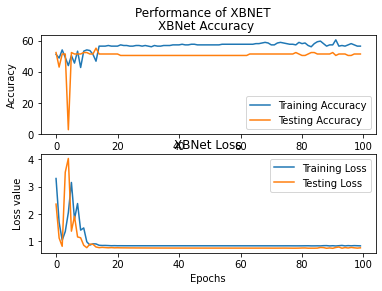

In [20]:
m,acc, lo, val_ac, val_lo = run_XBNET(x_train.values,x_test.values,y_train.values,y_test.values,model,criterion,optimizer,epochs=100,batch_size=32)

In [21]:
print(predict(m,X_test.to_numpy()[0,:]))

AxisError: ignored

#### Submission

In [49]:
#maindir = "/Users/Abimbola/Documents/MSc Computer Science/Semester 2/Computer science project/Blood-Spectorscopy/Data" # Directory with your files
maindir = "/content"
ss =  maindir+"/Updated_Sample_Submission.csv"
ss = pd.read_csv(ss)
ss.head()

ss = ss.drop(['Unnamed: 0'], axis= 1)

In [50]:
def transform_c_hdl(row):
    return pd.Series([str(row["donation_id"]) + "_hdl_cholesterol_human", row['hdl_cholesterol_human']])

In [51]:
sample_c_hdl = pd.DataFrame(columns = ss.columns)

In [52]:
from tqdm.notebook import tqdm

tqdm.pandas()
sample_c_hdl[['Donation_ID', 'target']] = test.progress_apply(transform_c_hdl, axis = 1)

  0%|          | 0/61 [00:00<?, ?it/s]

In [53]:
def transform_hemo(row):
    return pd.Series([str(row["donation_id"]) + "_hemoglobin(hgb)_human", row["hemoglobin_hgb_human"]])

In [54]:
sample_hemo = pd.DataFrame(columns = ss.columns)

In [55]:
sample_hemo[['Donation_ID', 'target']] = test.progress_apply(transform_hemo, axis = 1)

  0%|          | 0/61 [00:00<?, ?it/s]

In [56]:
sample_c_hdl

,Donation_ID,target
355,ID_1961_hdl_cholesterol_human,ok
356,ID_2067_hdl_cholesterol_human,ok
357,ID_2155_hdl_cholesterol_human,ok
358,ID_2211_hdl_cholesterol_human,ok
359,ID_2327_hdl_cholesterol_human,ok
...,...,...
411,ID_6373_hdl_cholesterol_human,ok
412,ID_6381_hdl_cholesterol_human,ok
413,ID_6391_hdl_cholesterol_human,ok
414,ID_7755_hdl_cholesterol_human,ok


In [57]:
def transform_c_ldl(row):
    return pd.Series([str(row["donation_id"]) + "_cholesterol_ldl_human", row["cholesterol_ldl_human"]])

In [58]:
sample_c_ldl = pd.DataFrame(columns = ss.columns)

In [59]:
sample_c_ldl[['Donation_ID', 'target']] = test.progress_apply(transform_c_ldl, axis = 1)

  0%|          | 0/61 [00:00<?, ?it/s]

In [60]:
submission = pd.concat([sample_c_hdl, sample_hemo, sample_c_ldl]).reset_index(drop=True)

In [61]:
submission = submission.loc[:, ~submission.columns.str.contains('^Unnamed')]

In [62]:
submission.head()

,Donation_ID,target
0,ID_1961_hdl_cholesterol_human,ok
1,ID_2067_hdl_cholesterol_human,ok
2,ID_2155_hdl_cholesterol_human,ok
3,ID_2211_hdl_cholesterol_human,ok
4,ID_2327_hdl_cholesterol_human,ok


In [63]:
submission.to_csv("./submission19.csv", index=False)

#### To do
 - Bagging with random undersampling
 - Use boosting algorithms (AdaBoost etc)
 - Read up SMOTE for imbalanced classification